 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_path = Path("../Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_path = Path("../Resources/sp_tsx_history.csv")
sp_tsx_df = pd.read_csv(sp_tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Check Data Types
sp_tsx_df.dtypes

Close    float64
dtype: object

In [10]:
# Fix Data Types
sp_tsx_df.astype(float)

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [11]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_df.pct_change()
sp_tsx_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [12]:
sp_tsx_daily_returns.dropna(inplace=True)
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns.columns=["S&P Returns"]
sp_tsx_daily_returns.head()

,S&P Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_daily_returns], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

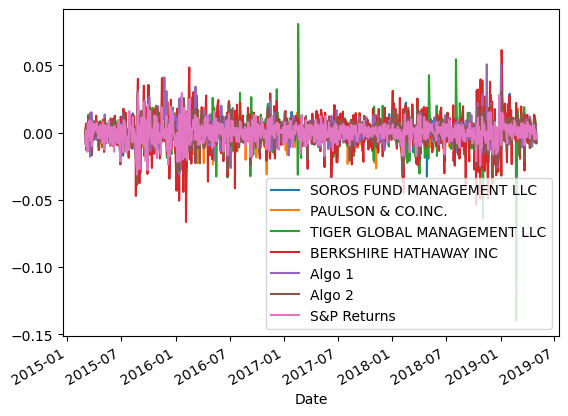

In [15]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

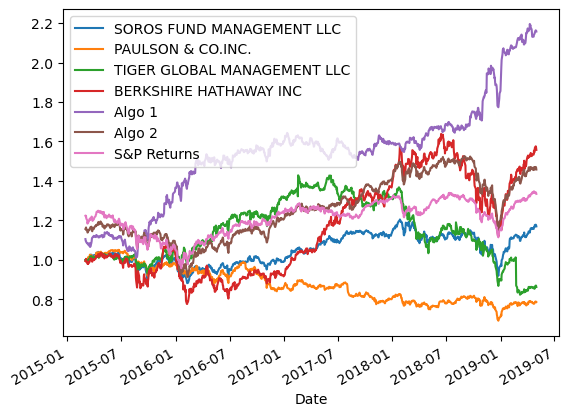

In [16]:
# Calculate cumulative returns of all portfolios
whale_cumulative_returns = (1+whale_returns_df).cumprod()
algo_cumulative_returns = (1+algo_returns_df).cumprod()
sp_tsx_cumulative_returns = (1+sp_tsx_daily_returns).cumprod()
combined_cumulative_returns = pd.concat([whale_cumulative_returns, algo_cumulative_returns, sp_tsx_cumulative_returns], axis='columns', join='inner')
# Plot cumulative returns
combined_cumulative_returns.plot()

In [17]:
print(f"Algo 1 outperforms all the other returns as it has the highest climb and increases it's returns around 2019 drastically while other returns drop around 2019")

Algo 1 outperforms all the other returns as it has the highest climb and increases it's returns around 2019 drastically while other returns drop around 2019


## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Whale Returns'}>

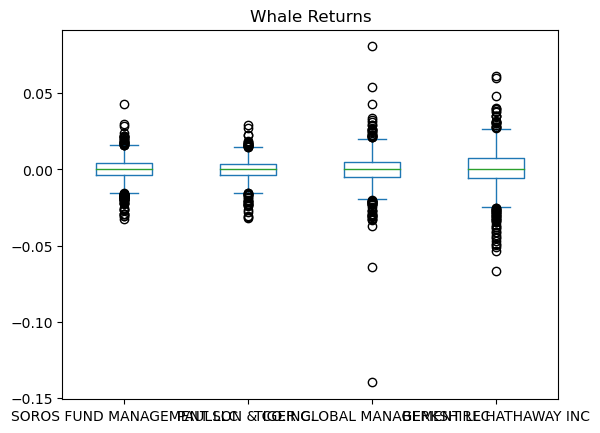

In [18]:
# Box plot to visually show risk
whale_returns_df.plot(kind="box", title = "Whale Returns")

<AxesSubplot:title={'center':'Algo Returns'}>

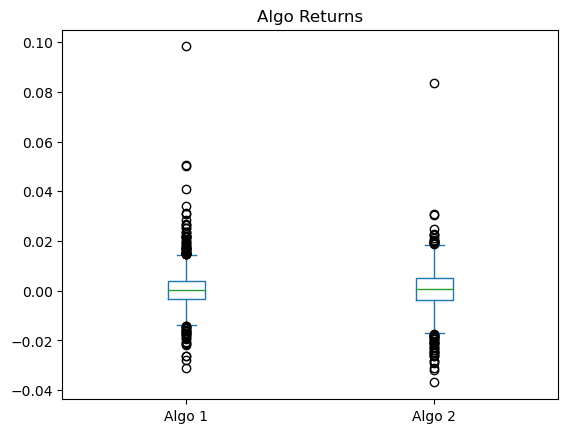

In [19]:
algo_returns_df.plot(kind="box", title = "Algo Returns")

<AxesSubplot:title={'center':'S&P Returns'}>

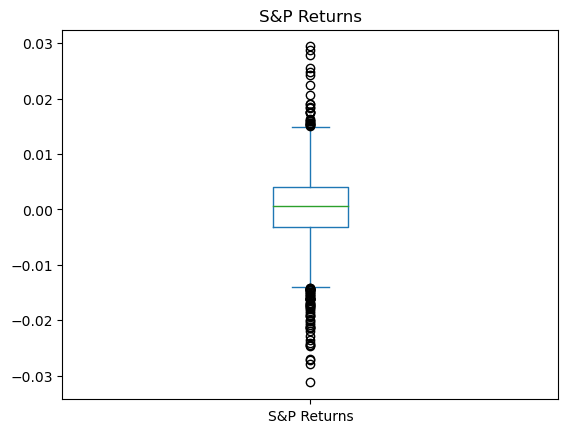

In [20]:
sp_tsx_daily_returns.plot(kind="box", title = "S&P Returns")

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
whale_returns_std = whale_returns_df.std().sort_values(ascending=False)
algo_returns_std = algo_returns_df.std().sort_values(ascending=False)
sp_tsx_daily_std = sp_tsx_daily_returns.std().sort_values(ascending=False)

In [22]:
whale_returns_std.head()

BERKSHIRE HATHAWAY INC         0.012831
TIGER GLOBAL MANAGEMENT LLC    0.010824
SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
dtype: float64

In [23]:
algo_returns_std.head()

Algo 2    0.008466
Algo 1    0.007988
dtype: float64

In [24]:
sp_tsx_daily_std.head()

S&P Returns    0.006637
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [25]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_daily_std = sp_tsx_daily_returns.std().sort_values(ascending=False)
# Determine which portfolios are riskier than the S&P TSX 60
print(f"Comparing the standard deviations provided, we can see that the following portfolios have a higher standard deviation than the S&P: BERKSHIRE HATHAWAY INC with a standard deviation of 0.012831, TIGER GLOBAL MANAGEMENT LLC with a standard deviation of 0.010824, Algo 2 with a standard deviation of 0.008466, Algo 1 with a standard deviation of 0.007988")

Comparing the standard deviations provided, we can see that the following portfolios have a higher standard deviation than the S&P: BERKSHIRE HATHAWAY INC with a standard deviation of 0.012831, TIGER GLOBAL MANAGEMENT LLC with a standard deviation of 0.010824, Algo 2 with a standard deviation of 0.008466, Algo 1 with a standard deviation of 0.007988


### Calculate the Annualized Standard Deviation

In [26]:
# Calculate the annualized standard deviation of all returns(252 trading days)
whale_returns_annual_std = whale_returns_std.std()*np.sqrt(252)
algo_returns_annual_std = algo_returns_std.std()*np.sqrt(252)
sp_tsx_daily_annual_std = sp_tsx_daily_std.std()*np.sqrt(252)

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

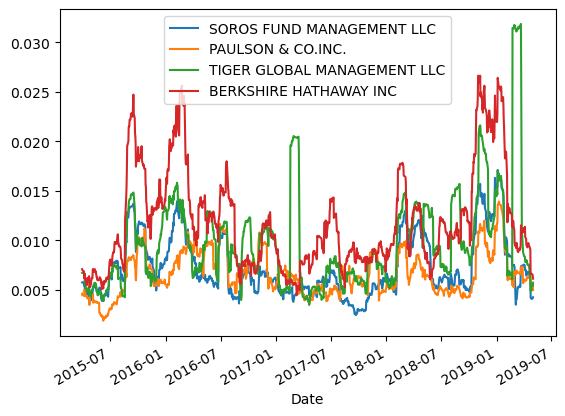

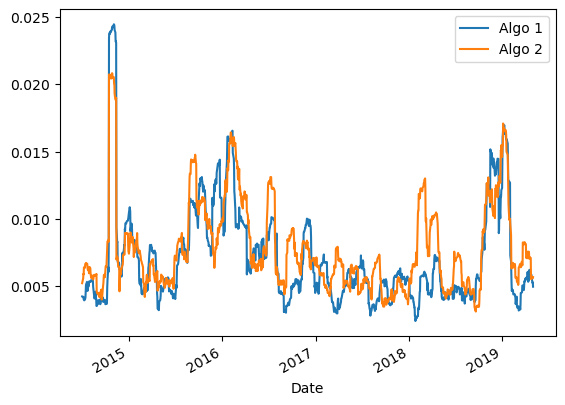

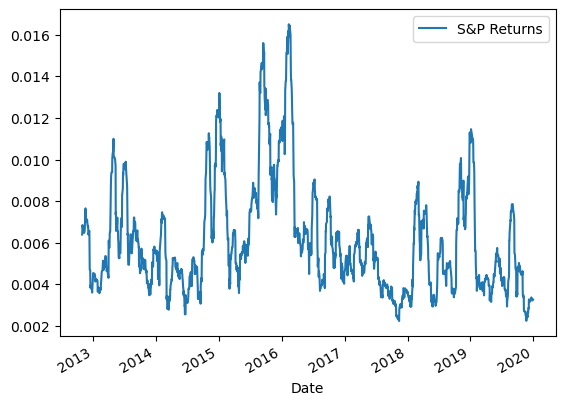

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_returns_df.rolling(window=21).std()
algo_returns_df.rolling(window=21).std()
sp_tsx_daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
whale_returns_df.rolling(window=21).std().plot()
algo_returns_df.rolling(window=21).std().plot()
sp_tsx_daily_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [28]:
# Calculate the correlation
combined_correlation = combined_df.corr()
# Display de correlation matrix
combined_correlation.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

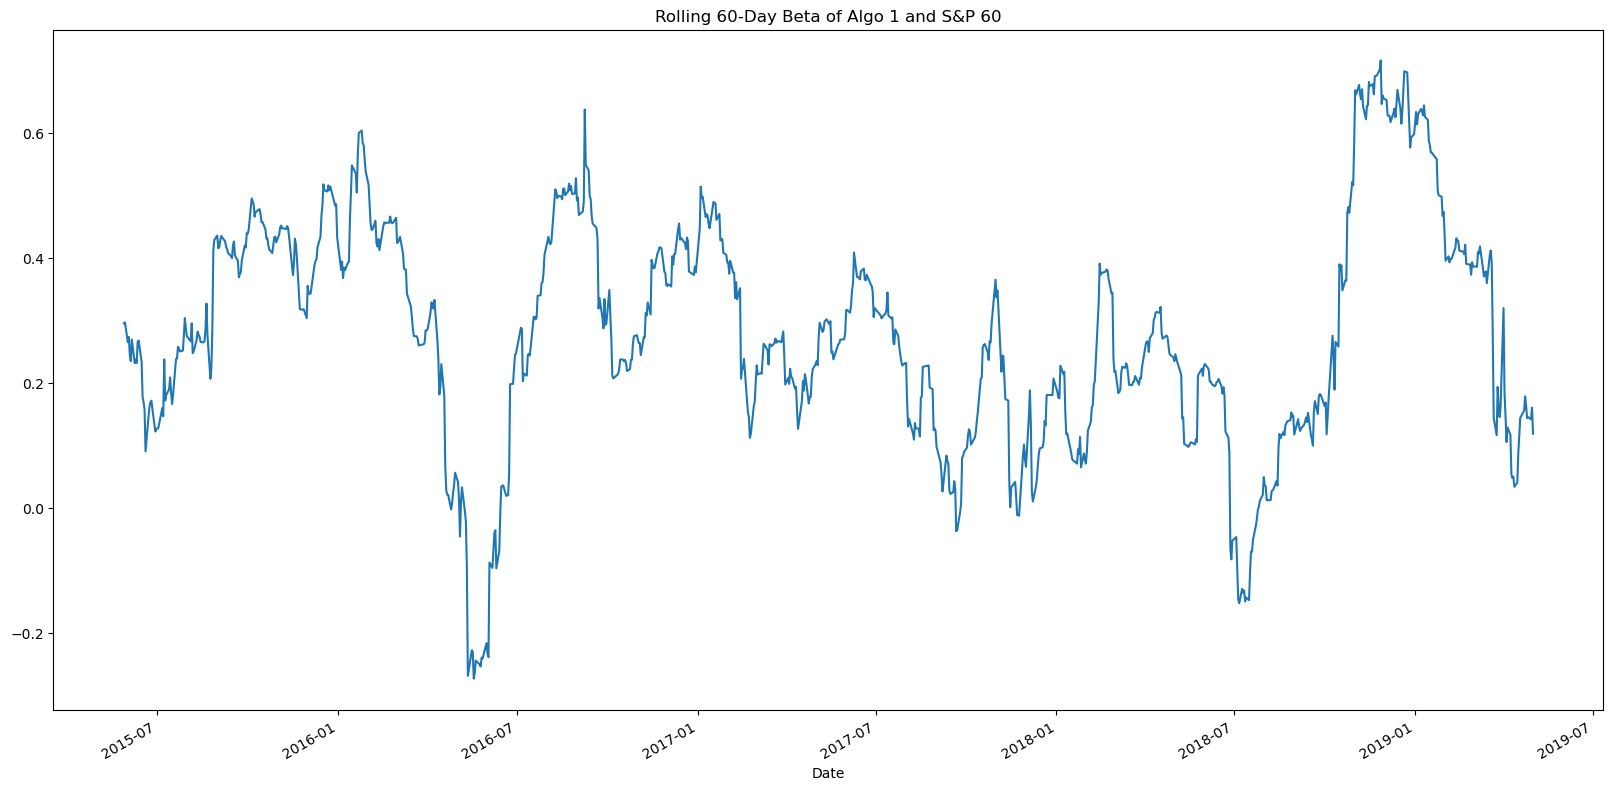

In [29]:
# Calculate covariance of a single portfolio
covariance = combined_df["Algo 1"].cov(combined_df["S&P Returns"])
# Calculate variance of S&P TSX
variance = combined_df["S&P Returns"].var()
# Computing beta
beta = covariance / variance
rolling_covariance = combined_df["Algo 1"].rolling(window=60).cov(combined_df["S&P Returns"])
rolling_variance = combined_df["S&P Returns"].rolling(window=60).var()
rolling_beta = rolling_covariance/rolling_variance
# Plot beta trend
ax = rolling_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of Algo 1 and S&P 60")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [30]:
# Use `ewm` to calculate the rolling window
half_life = 21
alpha = 1-np.exp(np.log(0.5)/half_life)
whale_ewm = whale_returns_df.ewm(alpha=alpha).std()
algo_ewm = algo_returns_df.ewm(alpha=alpha).std()
sp_tsx_ewm = sp_tsx_daily_returns.ewm(alpha=alpha).std()
print(whale_ewm.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                   0.002472            0.005814   
2015-03-05                   0.002677            0.004968   
2015-03-06                   0.005349            0.004615   
2015-03-09                   0.004638            0.004471   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                          NaN                     NaN  
2015-03-04                     0.001441                0.007624  
2015-03-05                     0.002478                0.007020  
2015-03-06                     0.004665                0.009387  
2015-03-09                     0.005496                0.008066  


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
sharpe_ratio_whale = (whale_returns_df.mean()*252)/(whale_returns_std*np.sqrt(252))
sharpe_ratio_whale

BERKSHIRE HATHAWAY INC         0.619628
PAULSON & CO.INC.             -0.462131
SOROS FUND MANAGEMENT LLC      0.361568
TIGER GLOBAL MANAGEMENT LLC   -0.118257
dtype: float64

In [32]:
sharpe_ratio_algo = (algo_returns_df.mean()*252)/(algo_returns_std*np.sqrt(252))
sharpe_ratio_algo

Algo 1    1.300176
Algo 2    0.639258
dtype: float64

In [33]:
sharpe_ratio_sp = (sp_tsx_daily_returns.mean()*252)/(sp_tsx_daily_std*np.sqrt(252))
sharpe_ratio_sp

S&P Returns    0.478866
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio of Whale Returns'}>

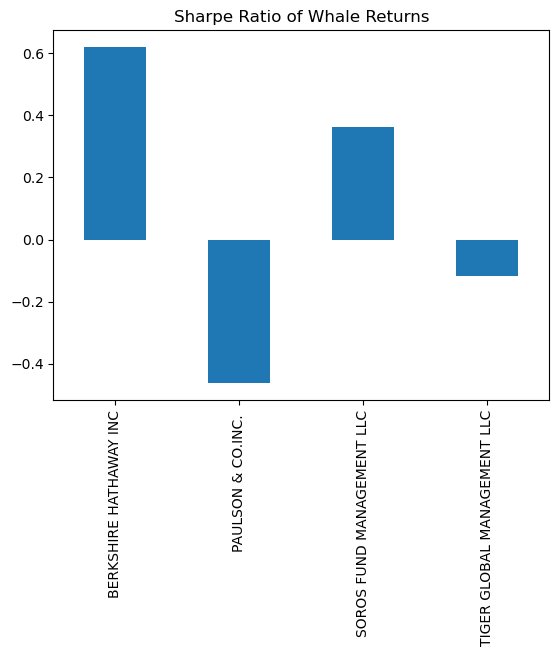

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_whale.plot(kind="bar", title = "Sharpe Ratio of Whale Returns")

<AxesSubplot:title={'center':'Sharpe Ratio of Algo'}>

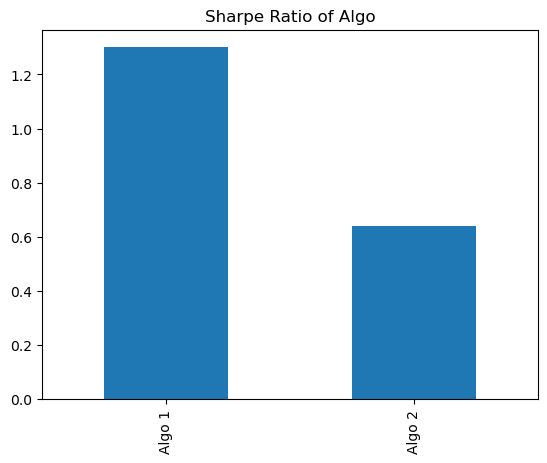

In [35]:
sharpe_ratio_algo.plot(kind="bar", title="Sharpe Ratio of Algo")

<AxesSubplot:title={'center':'Sharpe Ratio of S&P 60'}>

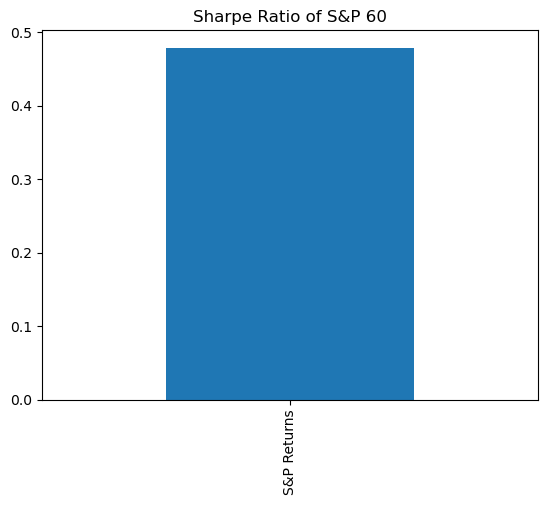

In [36]:
sharpe_ratio_sp.plot(kind="bar", title="Sharpe Ratio of S&P 60")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Upon examining the plotted graphs, it becomes apparent that the performance of Algo's portfolio surpasses both the S&P 60 and the Whales portfolio. A favorable Sharpe ratio typically falls within the range of 1 to 2. As illustrated in the graph, Algo 1's Sharpe ratio exceeds those of the other portfolios and remains the sole portfolio with a ratio situated between 1 and 2."_

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [37]:
# Reading data from 1st stock
L_csv_path = Path("../Resources/l_historical.csv")
L_df = pd.read_csv(L_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
L_df.rename(columns={'Close':'L_Close'}, inplace=True)

In [38]:
# Reading data from 2nd stock
otex_csv_path = Path("../Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.rename(columns={'Close':'Otex_Close'}, inplace=True)

In [39]:
# Reading data from 3rd stock
shop_csv_path = Path("../Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.rename(columns={'Close':'Shop_Close'}, inplace=True)

In [40]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([L_df, otex_df, shop_df], axis="columns", join="inner")

In [42]:
combined_stocks

,Symbol,L_Close,Symbol,Otex_Close,Symbol,Shop_Close
Date,,,,,,
2018-01-02,L,57.99,OTEX,43.58,SHOP,132.06
2018-01-03,L,57.41,OTEX,43.07,SHOP,135.15
2018-01-04,L,57.42,OTEX,42.91,SHOP,137.46
2018-01-05,L,57.42,OTEX,42.57,SHOP,137.26
2018-01-08,L,56.86,OTEX,42.16,SHOP,139.51
...,...,...,...,...,...,...
2019-12-20,L,67.90,OTEX,58.68,SHOP,513.22
2019-12-23,L,67.68,OTEX,57.89,SHOP,511.62
2019-12-24,L,67.67,OTEX,57.44,SHOP,525.39


In [43]:
# Calculate daily returns
daily_returns = combined_stocks[['L_Close', 'Otex_Close', 'Shop_Close']].pct_change()
# Drop NAs
daily_returns.dropna().copy()
# Display sample data
daily_returns.head()

,L_Close,Otex_Close,Shop_Close
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [44]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
# Display sample data
portfolio_returns

Date
2018-01-02         NaN
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 501, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns = pd.concat([portfolio_returns, daily_returns], axis='columns', join='inner')

In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns = combined_returns.dropna()
combined_returns

,0,L_Close,Otex_Close,Shop_Close
Date,,,,
2018-01-03,0.000565,-0.010002,-0.011703,0.023398
2018-01-04,0.004517,0.000174,-0.003715,0.017092
2018-01-05,-0.003126,0.000000,-0.007924,-0.001455
2018-01-08,-0.000997,-0.009753,-0.009631,0.016392
2018-01-09,-0.000999,0.008969,-0.000712,-0.011254
...,...,...,...,...
2019-12-20,0.007495,0.003547,0.024441,-0.005503
2019-12-23,-0.006607,-0.003240,-0.013463,-0.003118
2019-12-24,0.006331,-0.000148,-0.007773,0.026915


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
annualized_std = combined_returns.std()*np.sqrt(252)
annualized_std

0             0.216794
L_Close       0.152369
Otex_Close    0.215132
Shop_Close    0.488717
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling STD 21 Window'}, xlabel='Date'>

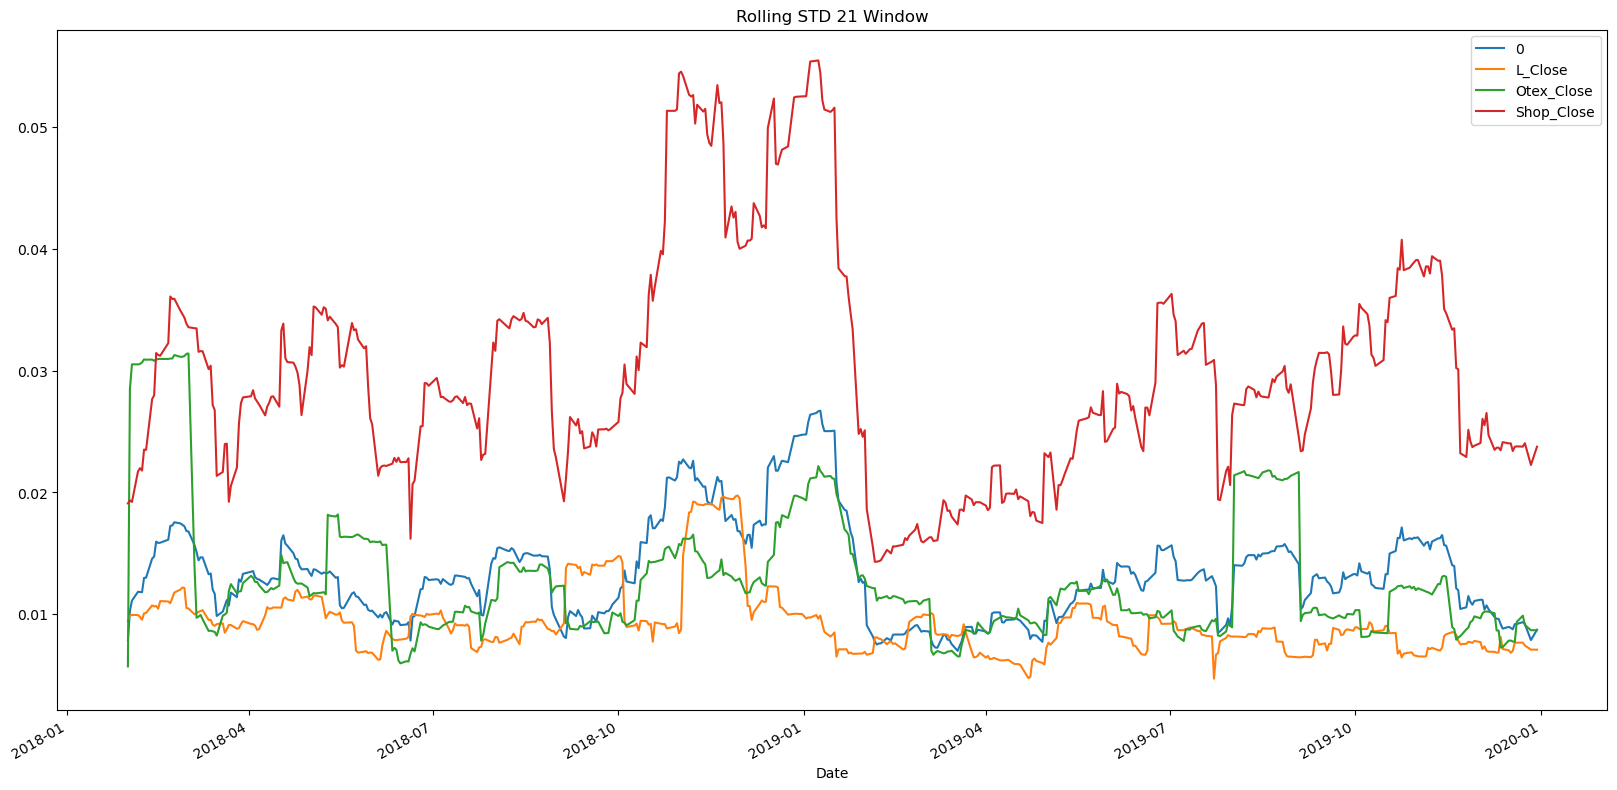

In [48]:
# Calculate rolling standard deviation
rolling_window = combined_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_window.plot(figsize=(20,10), title = "Rolling STD 21 Window")


### Calculate and plot the correlation

In [49]:
# Calculate and plot the correlation
correlation = combined_returns.corr()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [50]:
# Calculate and plot Beta
L_covariance = combined_returns["L_Close"].cov(combined_df["S&P Returns"])
Otex_covariance = combined_returns["Otex_Close"].cov(combined_df["S&P Returns"])
Shop_covariance = combined_returns["Shop_Close"].cov(combined_df["S&P Returns"])
variance = combined_df["S&P Returns"].var()
L_Beta = L_covariance / variance
Otex_beta = Otex_covariance/variance
Shop_Beta = Shop_covariance/variance

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (combined_returns.mean()*252)/(combined_returns.std()*np.sqrt(252))
sharpe_ratio

0             1.623501
L_Close       0.570084
Otex_Close    0.743512
Shop_Close    1.655513
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

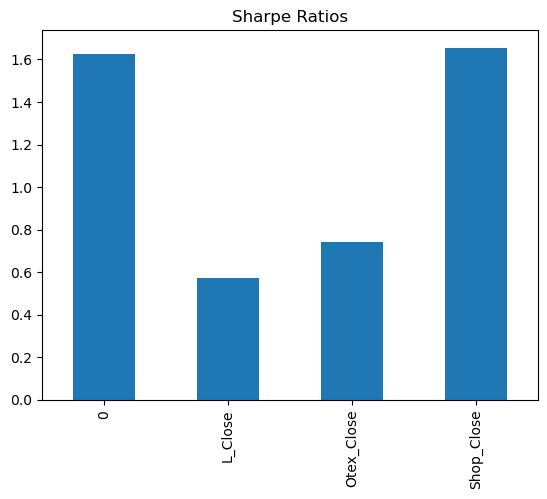

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Upon examining the bar graph presented above, it becomes apparent that Shop's returns surpass all of the other investments, boasting a remarkable Sharpe ratio of 1.6. This impressive figure establishes Shop as the most lucrative investment choice when compared to its competitors. The Sharpe ratio is a well-established metric used to evaluate an investment's risk-adjusted returns, taking into account the level of volatility or risk involved in achieving those returns. In this case, Shop's strong Sharpe ratio indicates that it has outperformed its peers by generating higher returns with less risk. Therefore, based on the data presented in the graph, it is clear that Shop is the optimal investment choice for those seeking maximum returns with minimal risk.